In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv("Airlines_dataset.csv")

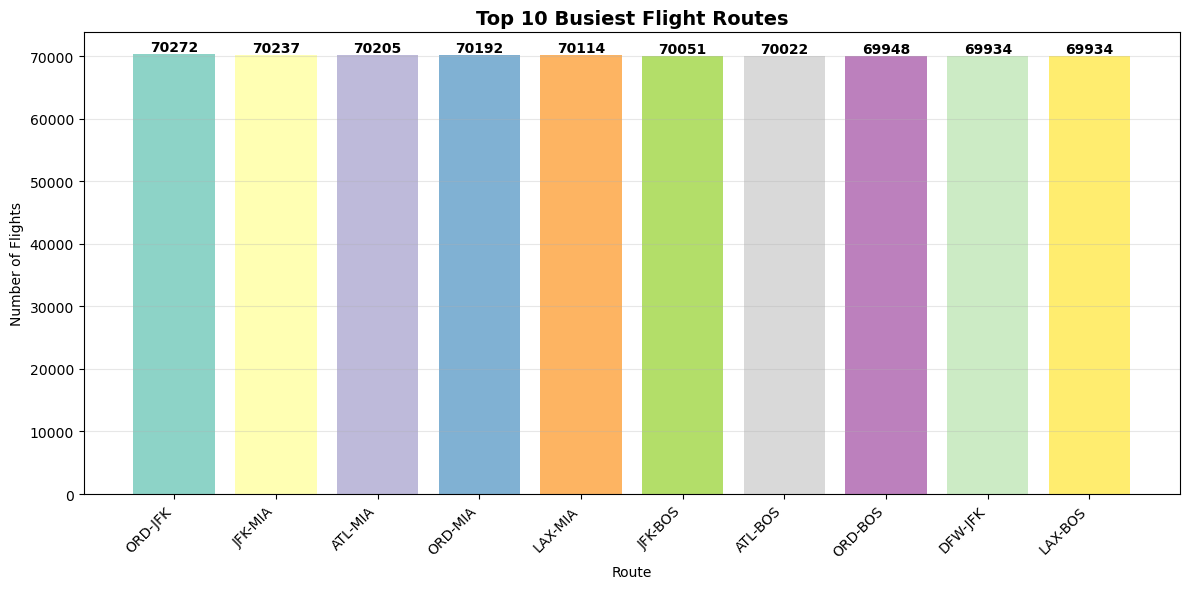

Busiest route: ORD-JFK with 70272 flights


In [7]:
# VISUALIZATION 1: Top 10 Busiest Routes
plt.figure(figsize=(12, 6))
top_routes = df['Route'].value_counts().head(10)
colors = plt.cm.Set3(np.linspace(0, 1, len(top_routes)))
bars = plt.bar(range(len(top_routes)), top_routes.values, color=colors)

plt.title('Top 10 Busiest Flight Routes', fontsize=14, fontweight='bold')
plt.xlabel('Route')
plt.ylabel('Number of Flights')
plt.xticks(range(len(top_routes)), top_routes.index, rotation=45, ha='right')

# Add value labels on bars
for i, (route, count) in enumerate(zip(top_routes.index, top_routes.values)):
    plt.text(i, count + 0.1, f'{count}', ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Busiest route: {top_routes.index[0]} with {top_routes.values[0]} flights")


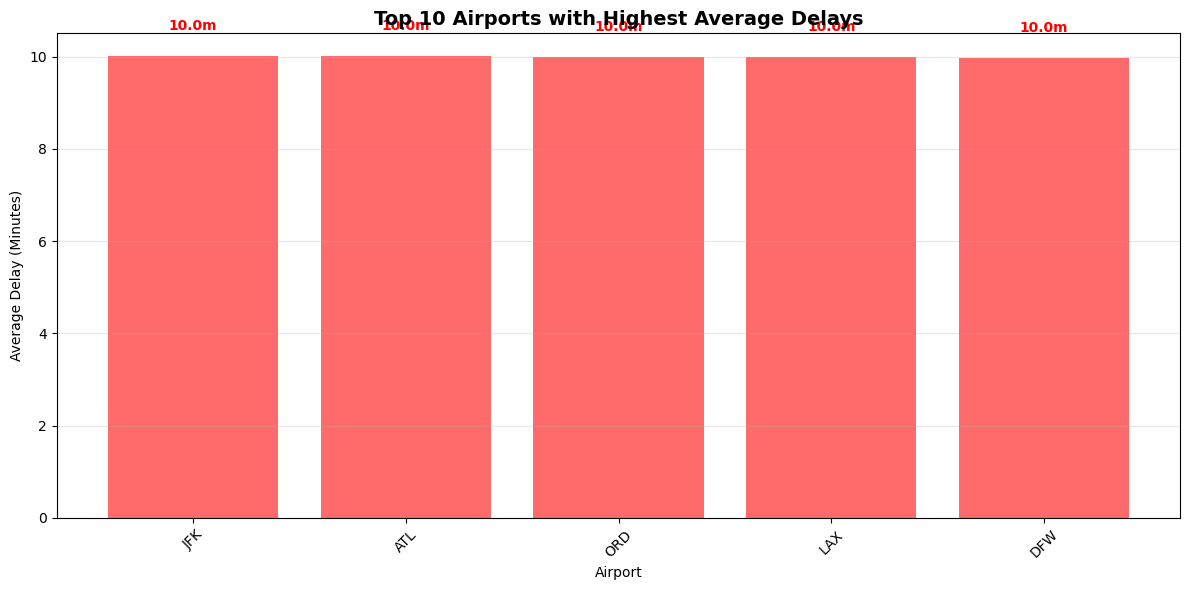

Most delay-prone airport: JFK (10.0 min average)


In [8]:
# VISUALIZATION 2: Airport Delay Performance
plt.figure(figsize=(12, 6))
airport_delays = df.groupby('Origin')['DelayMinutes'].mean().sort_values(ascending=False).head(10)

colors = ['#ff6b6b' if delay > 0 else '#51cf66' for delay in airport_delays.values]
bars = plt.bar(range(len(airport_delays)), airport_delays.values, color=colors)

plt.title('Top 10 Airports with Highest Average Delays', fontsize=14, fontweight='bold')
plt.xlabel('Airport')
plt.ylabel('Average Delay (Minutes)')
plt.xticks(range(len(airport_delays)), airport_delays.index, rotation=45)

# Add value labels
for i, (airport, delay) in enumerate(zip(airport_delays.index, airport_delays.values)):
    color = 'red' if delay > 0 else 'green'
    plt.text(i, delay + 0.5, f'{delay:.1f}m', ha='center', va='bottom', 
             fontweight='bold', color=color)

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Most delay-prone airport: {airport_delays.index[0]} ({airport_delays.values[0]:.1f} min average)")

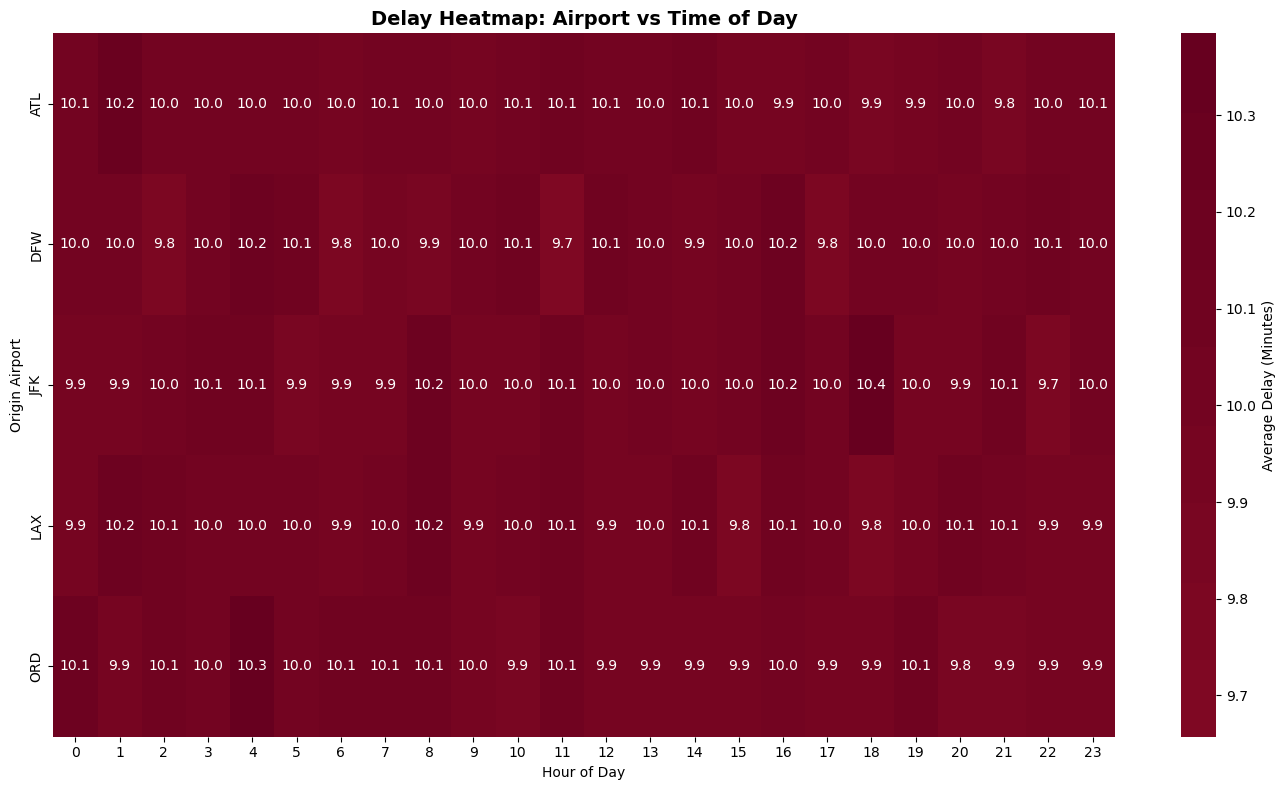

Heatmap shows delay patterns across airports and hours
Red = More delays, Blue = Fewer delays


In [9]:
# VISUALIZATION 3: Delay Heatmap by Airport and Hour
plt.figure(figsize=(14, 8))

# Prepare heatmap data - take top 15 airports for clarity
top_airports = df['Origin'].value_counts().head(15).index
heatmap_data = df[df['Origin'].isin(top_airports)].pivot_table(
    values='DelayMinutes', 
    index='Origin', 
    columns='Hour', 
    aggfunc='mean'
)

sns.heatmap(heatmap_data, cmap='RdBu_r', center=0, annot=True, fmt='.1f',
            cbar_kws={'label': 'Average Delay (Minutes)'})
plt.title('Delay Heatmap: Airport vs Time of Day', fontsize=14, fontweight='bold')
plt.xlabel('Hour of Day')
plt.ylabel('Origin Airport')
plt.tight_layout()
plt.show()

print("Heatmap shows delay patterns across airports and hours")
print("Red = More delays, Blue = Fewer delays")

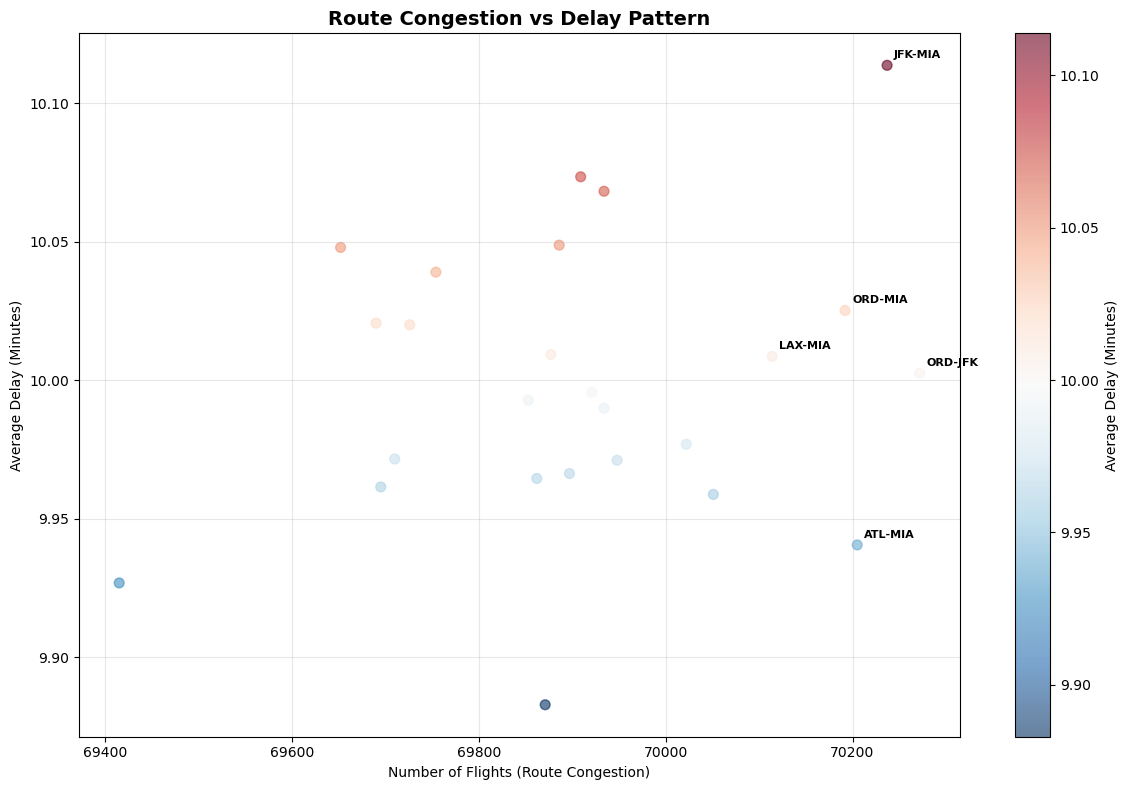

Analyzing 25 routes
Each point represents a route - size shows flight volume, color shows delay severity


In [10]:
# VISUALIZATION 4: Route Congestion vs Delay
plt.figure(figsize=(12, 8))

route_stats = df.groupby('Route').agg({
    'FlightID': 'count',
    'DelayMinutes': 'mean'
}).rename(columns={'FlightID': 'FlightCount', 'DelayMinutes': 'AvgDelay'})

# Create scatter plot
plt.scatter(route_stats['FlightCount'], route_stats['AvgDelay'], 
           alpha=0.6, s=50, c=route_stats['AvgDelay'], cmap='RdBu_r')

plt.xlabel('Number of Flights (Route Congestion)')
plt.ylabel('Average Delay (Minutes)')
plt.title('Route Congestion vs Delay Pattern', fontsize=14, fontweight='bold')
plt.colorbar(label='Average Delay (Minutes)')
plt.grid(True, alpha=0.3)

# Highlight top 5 busiest routes
top_5_busiest = route_stats.nlargest(5, 'FlightCount')
for idx, row in top_5_busiest.iterrows():
    plt.annotate(idx, (row['FlightCount'], row['AvgDelay']), 
                 xytext=(5, 5), textcoords='offset points', 
                 fontweight='bold', fontsize=8)

plt.tight_layout()
plt.show()

print(f"Analyzing {len(route_stats)} routes")
print("Each point represents a route - size shows flight volume, color shows delay severity")

<Figure size 1400x800 with 0 Axes>

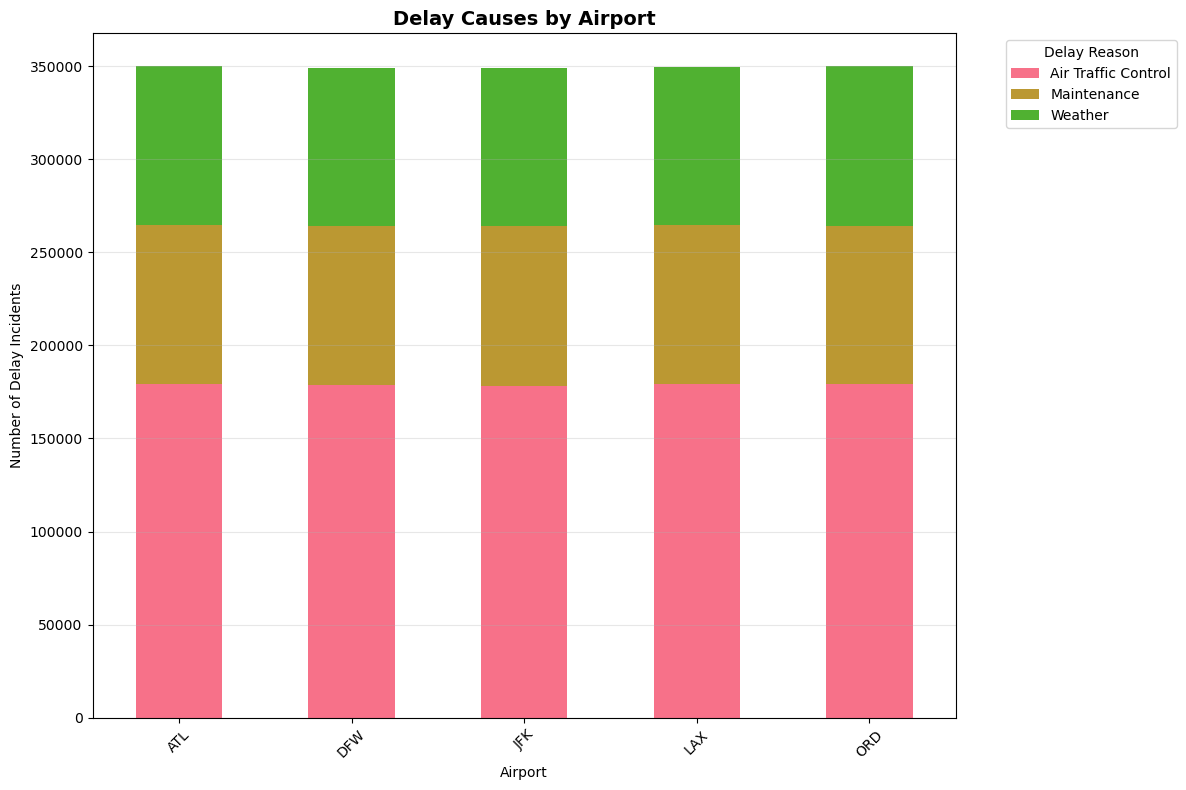

Stacked bars show what's causing delays at each major airport


In [11]:
# VISUALIZATION 5: Delay Causes by Airport
plt.figure(figsize=(14, 8))

# Get top 8 airports and their delay reasons
top_airports = df['Origin'].value_counts().head(8).index
delay_causes = df[df['Origin'].isin(top_airports)].groupby(['Origin', 'DelayReason']).size().unstack(fill_value=0)

delay_causes.plot(kind='bar', stacked=True)
plt.title('Delay Causes by Airport', fontsize=14, fontweight='bold')
plt.xlabel('Airport')
plt.ylabel('Number of Delay Incidents')
plt.xticks(rotation=45)
plt.legend(title='Delay Reason', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print("Stacked bars show what's causing delays at each major airport")

C:\Users\dell\AppData\Local\Temp\ipykernel_30576\1630717572.py:17: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\dell\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


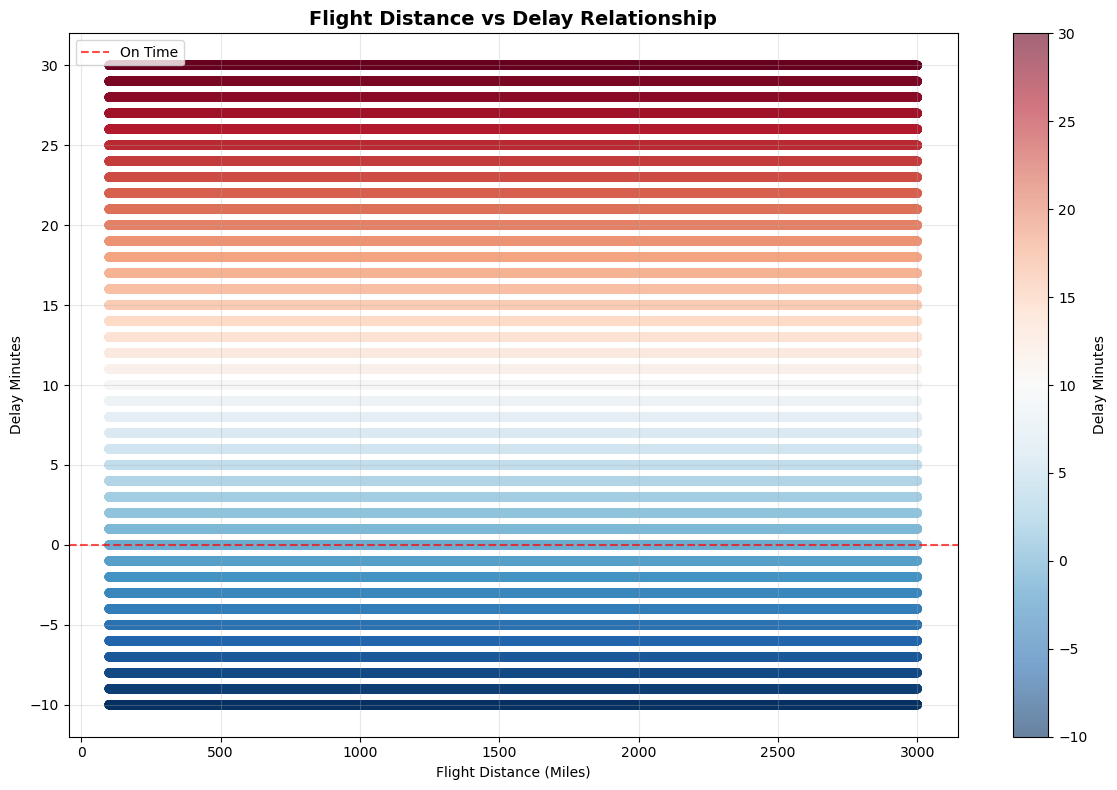

Correlation between distance and delay: 0.000
Red = Positive delays, Blue = Early arrivals


In [12]:
# VISUALIZATION 6: Distance vs Delay Analysis
plt.figure(figsize=(12, 8))

# Create scatter plot with coloring
scatter = plt.scatter(df['Distance'], df['DelayMinutes'], 
                     alpha=0.6, c=df['DelayMinutes'], 
                     cmap='RdBu_r', s=30)

plt.colorbar(scatter, label='Delay Minutes')
plt.axhline(y=0, color='red', linestyle='--', alpha=0.7, label='On Time')
plt.xlabel('Flight Distance (Miles)')
plt.ylabel('Delay Minutes')
plt.title('Flight Distance vs Delay Relationship', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print(f"Correlation between distance and delay: {df['Distance'].corr(df['DelayMinutes']):.3f}")
print("Red = Positive delays, Blue = Early arrivals")

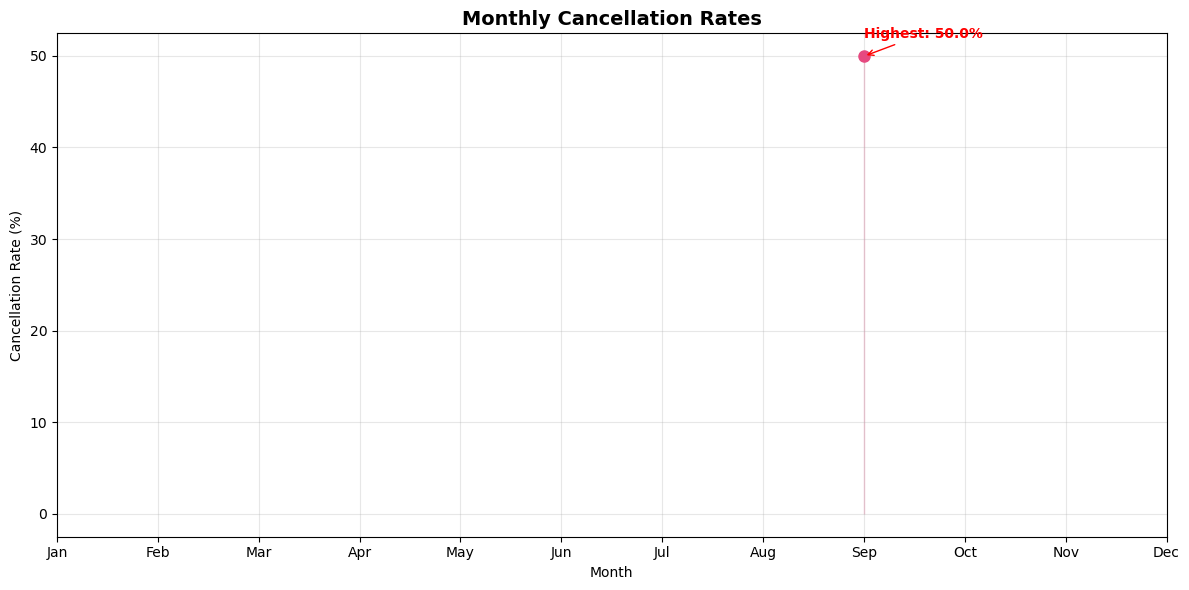

Worst month for cancellations: Month 9 (50.0%)


In [13]:
# =============================================================================
# WEEK 6: Seasonal and Cancellation Analysis
# =============================================================================

# VISUALIZATION 1: Monthly Cancellation Trends
plt.figure(figsize=(12, 6))

monthly_cancellations = df.groupby('Month')['Cancelled'].mean() * 100
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_cancellations = monthly_cancellations.reindex(range(1, 13))

plt.plot(monthly_cancellations.index, monthly_cancellations.values, 
         marker='o', linewidth=2, markersize=8, color='#e64980')
plt.fill_between(monthly_cancellations.index, monthly_cancellations.values, alpha=0.3, color='#e64980')

plt.title('Monthly Cancellation Rates', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(range(1, 13), months)
plt.grid(True, alpha=0.3)

# Highlight worst month
worst_month = monthly_cancellations.idxmax()
worst_rate = monthly_cancellations.max()
plt.annotate(f'Highest: {worst_rate:.1f}%', 
             xy=(worst_month, worst_rate), 
             xytext=(worst_month, worst_rate + 2),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontweight='bold', color='red')

plt.tight_layout()
plt.show()

print(f"Worst month for cancellations: Month {worst_month} ({worst_rate:.1f}%)")

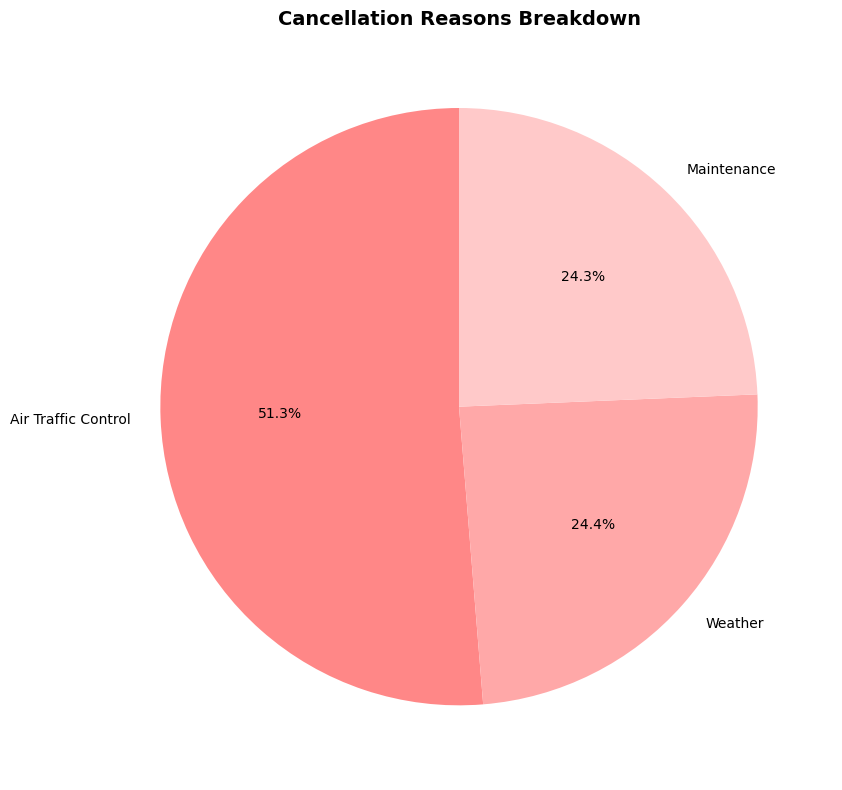

Total cancellations: 873193
Main cancellation reason: Air Traffic Control (447850 flights)


In [14]:
# VISUALIZATION 2: Cancellation Reasons
plt.figure(figsize=(10, 8))

cancelled_flights = df[df['Cancelled'] == True]
if not cancelled_flights.empty:
    cancel_reasons = cancelled_flights['DelayReason'].value_counts()
    colors = ['#ff8787', '#ffa8a8', '#ffc9c9', '#ffd8a8', '#b2f2bb']
    
    plt.pie(cancel_reasons.values, labels=cancel_reasons.index, autopct='%1.1f%%', 
            colors=colors, startangle=90)
    plt.title('Cancellation Reasons Breakdown', fontsize=14, fontweight='bold')
else:
    plt.text(0.5, 0.5, 'No Cancellations in Dataset', ha='center', va='center', 
             fontsize=16, transform=plt.gca().transAxes)
    plt.title('Cancellation Analysis', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

if not cancelled_flights.empty:
    print(f"Total cancellations: {len(cancelled_flights)}")
    print(f"Main cancellation reason: {cancel_reasons.index[0]} ({cancel_reasons.values[0]} flights)")

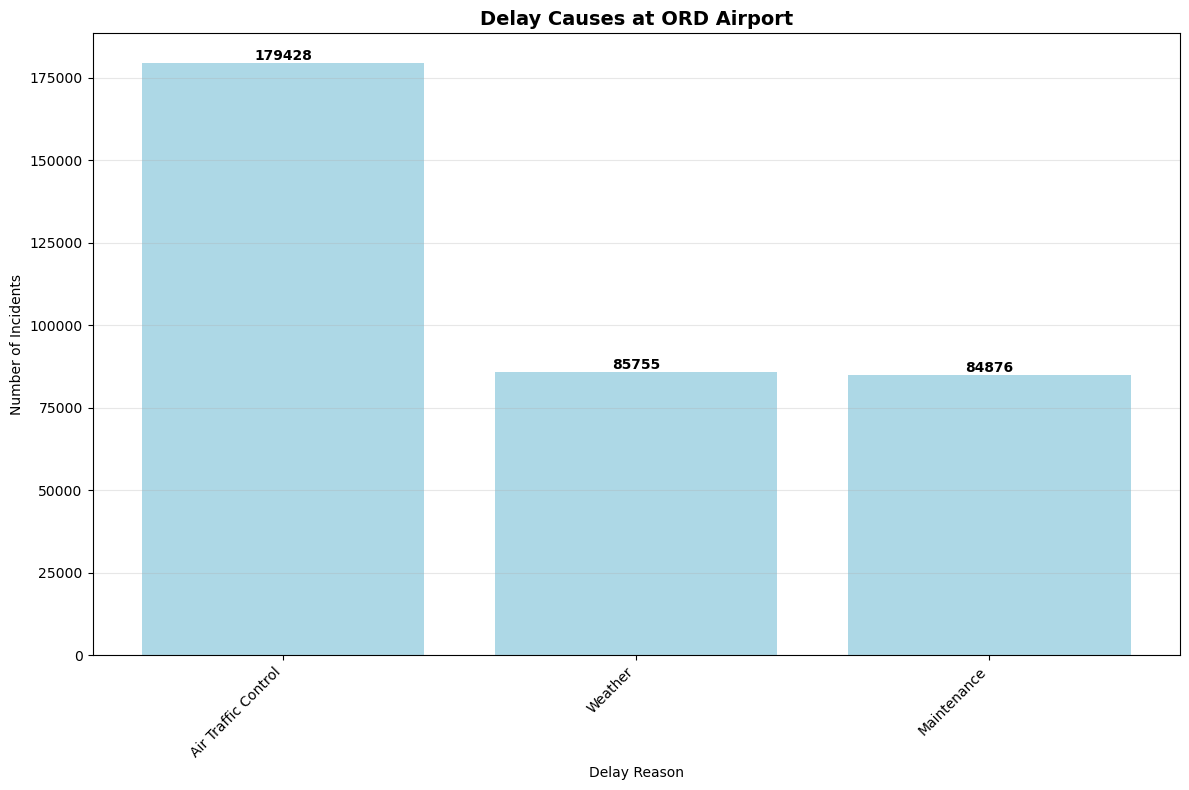

Delay analysis for ORD airport:
  - Air Traffic Control: 179428 delays
  - Weather: 85755 delays
  - Maintenance: 84876 delays


In [16]:
# VISUALIZATION 5: Horizontal Bar Chart (Most Stable)
plt.figure(figsize=(12, 8))

# Get data for one specific airport to avoid complexity
specific_airport = df['Origin'].value_counts().index[0]  # Use the busiest airport
airport_data = df[df['Origin'] == specific_airport]

# Get delay reasons for this airport
delay_reasons = airport_data['DelayReason'].value_counts()

# Create simple bar chart (not stacked)
plt.bar(range(len(delay_reasons)), delay_reasons.values, color='lightblue')
plt.title(f'Delay Causes at {specific_airport} Airport', fontsize=14, fontweight='bold')
plt.xlabel('Delay Reason')
plt.ylabel('Number of Incidents')
plt.xticks(range(len(delay_reasons)), delay_reasons.index, rotation=45, ha='right')

# Add value labels
for i, (reason, count) in enumerate(delay_reasons.items()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom', fontweight='bold')

plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Delay analysis for {specific_airport} airport:")
for reason, count in delay_reasons.items():
    print(f"  - {reason}: {count} delays")